In [1]:
import pandas as pd
import numpy as np
from funciones import datos, analisis, modelado
import pickle
import evalml
from evalml import AutoMLSearch

In [3]:
base = pd.read_csv(r'C:\Users\User\Documents\Backup\Proyectos\Debito_Automatico_ML\DB\base_datos_eda.csv', sep='|', decimal=',')

In [3]:
base.head(3)

puntajeDS Sistema_Operativo  estadomovil  ingresoMensual_iff_cal  EAScore  \
0        1.0           Android            9                 2300000    272.0   
1        1.0             Apple            9                 2000000     75.0   
2     -996.0           Android            4                 3500000    141.0   

  Ciudad_catg  ipDistanceKm Departamento_IP  VlrPago_Vencimiento_SMMLV_cal  \
0      BOGOTA           0.0          BOGOTA                           0.31   
1        OTRO           1.0            OTRO                           0.44   
2        OTRO         664.0          BOGOTA                           0.30   

   plazoSolicitado  Meses_Primera_Solicitud  Porcn_gasto_cal Tipo_Cliente  \
0               30                        0             0.43        Nuevo   
1               30                        0             0.75        Nuevo   
2               24                        7             0.43   Recurrente   

  nivelEstudio_catg  numeropersonasdependientes_cal  Score_cal   documento  \
0         Bachiller                               1      710.0    80140622   
1          Pregrado                               0      532.0  1065645849   
2         Tecnologo                               2      579.0  1080295881   

   credito_id Periodo_Desembolso  Target  
0      951740            2021-05       0  
1      953039            2021-05       1  
2      955797            2021-05       0

In [4]:
print(base.columns.to_list())

['puntajeDS', 'Sistema_Operativo', 'estadomovil', 'ingresoMensual_iff_cal', 'EAScore', 'Ciudad_catg', 'ipDistanceKm', 'Departamento_IP', 'VlrPago_Vencimiento_SMMLV_cal', 'plazoSolicitado', 'Meses_Primera_Solicitud', 'Porcn_gasto_cal', 'Tipo_Cliente', 'nivelEstudio_catg', 'numeropersonasdependientes_cal', 'Score_cal', 'documento', 'credito_id', 'Periodo_Desembolso', 'Target']


In [4]:
campos = ['puntajeDS', 'Sistema_Operativo', 'estadomovil', 'ingresoMensual_iff_cal', 'EAScore', 'Ciudad_catg', 'ipDistanceKm', 'Departamento_IP'
         , 'VlrPago_Vencimiento_SMMLV_cal', 'plazoSolicitado', 'Meses_Primera_Solicitud', 'Porcn_gasto_cal', 'Tipo_Cliente', 'nivelEstudio_catg'
         , 'numeropersonasdependientes_cal', 'Score_cal', 'Target']

In [6]:
X_train, X_test, y_train, y_test = modelado.particion(base[campos], 'Target', 0.25)

In [17]:
automl = AutoMLSearch(X_train=X_train, y_train=y_train,
                      problem_type='binary',
                      objective='f1',
                      additional_objectives=['auc'],
                      allowed_model_families=["catboost", "random_forest", "linear_model"],
                      max_batches=3,
                      verbose=True)
automl.search()


*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 3 batches for a total of None pipelines. 
Allowed model families: 



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean F1: 0.000

*****************************
* Evaluating Batch Number 1 *
*****************************



C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



Logistic Regression Classifier w/ Label Encoder + Imputer + One Hot Encoder + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean F1: 0.277


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1: 0.279


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant




*****************************
* Evaluating Batch Number 2 *
*****************************

Logistic Regression Classifier w/ Label Encoder + Imputer + One Hot Encoder + Undersampler + Standard Scaler + RF Classifier Select From Model:
	Starting cross validation
	Finished cross validation - mean F1: 0.272


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder + Undersampler + RF Classifier Select From Model:
	Starting cross validation
	Finished cross validation - mean F1: 0.275


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant




*****************************
* Evaluating Batch Number 3 *
*****************************

Decision Tree Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1: 0.259


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1: 0.276


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



Extra Trees Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1: 0.271


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



Elastic Net Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean F1: 0.274


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



CatBoost Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + Undersampler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1: 0.265


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



XGBoost Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1: 0.277


C:\Users\User\anaconda3\envs\auto_evalml\lib\site-packages\jupyter_client\session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant




Search finished after 00:42            
Best pipeline: Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder + Undersampler
Best pipeline F1: 0.279462


In [18]:
automl.rankings

id                                      pipeline_name  search_order  \
0    2  Random Forest Classifier w/ Label Encoder + Im...             2   
1   10  XGBoost Classifier w/ Label Encoder + Select C...            10   
2    1  Logistic Regression Classifier w/ Label Encode...             1   
3    6  LightGBM Classifier w/ Label Encoder + Select ...             6   
4    4  Random Forest Classifier w/ Label Encoder + Im...             4   
5    8  Elastic Net Classifier w/ Label Encoder + Sele...             8   
6    3  Logistic Regression Classifier w/ Label Encode...             3   
7    7  Extra Trees Classifier w/ Label Encoder + Sele...             7   
8    9  CatBoost Classifier w/ Label Encoder + Select ...             9   
9    5  Decision Tree Classifier w/ Label Encoder + Se...             5   
10   0       Mode Baseline Binary Classification Pipeline             0   

    mean_cv_score  standard_deviation_cv_score  validation_score  \
0             NaN                          NaN          0.279462   
1             NaN                          NaN          0.276868   
2             NaN                          NaN          0.276703   
3             NaN                          NaN          0.275595   
4             NaN                          NaN          0.275288   
5             NaN                          NaN          0.274210   
6             NaN                          NaN          0.272236   
7             NaN                          NaN          0.270913   
8             NaN                          NaN          0.264664   
9             NaN                          NaN          0.258819   
10            NaN                          NaN          0.000000   

    percent_better_than_baseline  high_variance_cv  \
0                      27.946183             False   
1                      27.686778             False   
2                      27.670336             False   
3                      27.559457             False   
4                      27.528795             False   
5                      27.420974             False   
6                      27.223573             False   
7                      27.091263             False   
8                      26.466390             False   
9                      25.881891             False   
10                      0.000000             False   

                                           parameters  
0   {'Label Encoder': {'positive_label': None}, 'I...  
1   {'Label Encoder': {'positive_label': None}, 'N...  
2   {'Label Encoder': {'positive_label': None}, 'I...  
3   {'Label Encoder': {'positive_label': None}, 'N...  
4   {'Label Encoder': {'positive_label': None}, 'I...  
5   {'Label Encoder': {'positive_label': None}, 'N...  
6   {'Label Encoder': {'positive_label': None}, 'I...  
7   {'Label Encoder': {'positive_label': None}, 'N...  
8   {'Label Encoder': {'positive_label': None}, 'N...  
9   {'Label Encoder': {'positive_label': None}, 'N...  
10  {'Label Encoder': {'positive_label': None}, 'B...

In [19]:
best_pipeline = automl.best_pipeline

In [20]:
best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'One Hot Encoder': ['One Hot Encoder', 'Imputer.x', 'Label Encoder.y'], 'Undersampler': ['Undersampler', 'One Hot Encoder.x', 'Label Encoder.y'], 'Random Forest Classifier': ['Random Forest Classifier', 'Undersampler.x', 'Undersampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'One Hot Encoder':{'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': 'if_binary', 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'Undersampler':{'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'Random Forest Classifier':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}, random_seed=0)

In [12]:
best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'One Hot Encoder': ['One Hot Encoder', 'Imputer.x', 'Label Encoder.y'], 'Undersampler': ['Undersampler', 'One Hot Encoder.x', 'Label Encoder.y'], 'Random Forest Classifier': ['Random Forest Classifier', 'Undersampler.x', 'Undersampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'One Hot Encoder':{'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': 'if_binary', 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'Undersampler':{'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'Random Forest Classifier':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}, random_seed=0)

In [21]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


****************************************************************************************
* Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder + Undersampler *
****************************************************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
4. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
	 * sampling_ratio_dict : None
5. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Objective to optimize binary classification pipeline thres

In [22]:
best_pipeline.feature_importance

feature  importance
0                Tipo_Cliente_Nuevo    0.263749
1                         puntajeDS    0.142007
2                         Score_cal    0.102627
3                   plazoSolicitado    0.101346
4                      ipDistanceKm    0.061675
5     VlrPago_Vencimiento_SMMLV_cal    0.048967
6                Ciudad_catg_BOGOTA    0.040323
7                       estadomovil    0.038449
8                           EAScore    0.037380
9           Meses_Primera_Solicitud    0.031465
10             Ciudad_catg_MEDELLIN    0.021167
11           Departamento_IP_BOGOTA    0.020011
12        Departamento_IP_ANTIOQUIA    0.017091
13           ingresoMensual_iff_cal    0.015396
14                  Porcn_gasto_cal    0.012077
15        Sistema_Operativo_Windows    0.010279
16         Ciudad_catg_CUNDINAMARCA    0.004122
17           Sistema_Operativo_Otro    0.003992
18      nivelEstudio_catg_Bachiller    0.003757
19            Departamento_IP_Vacio    0.003706
20   numeropersonasdependientes_cal    0.002894
21                 Ciudad_catg_OTRO    0.002120
22        Sistema_Operativo_Android    0.001999
23            Ciudad_catg_ANTIOQUIA    0.001990
24       nivelEstudio_catg_Posgrado    0.001928
25       nivelEstudio_catg_Pregrado    0.001510
26          Sistema_Operativo_Apple    0.001275
27        Departamento_IP_ATLANTICO    0.000937
28            Ciudad_catg_ATLANTICO    0.000861
29         nivelEstudio_catg_Basico    0.000787
30        nivelEstudio_catg_Tecnico    0.000744
31             Departamento_IP_OTRO    0.000691
32                 Ciudad_catg_CALI    0.000657
33      nivelEstudio_catg_Tecnologo    0.000509
34  Departamento_IP_VALLE DEL CAUCA    0.000458
35     Departamento_IP_CUNDINAMARCA    0.000423
36        nivelEstudio_catg_Ninguno    0.000395
37          Sistema_Operativo_Linux    0.000233

In [23]:
from evalml.model_understanding import calculate_permutation_importance
calculate_permutation_importance(best_pipeline, X_test, y_test, 'log loss binary')

feature  importance
0                     Tipo_Cliente    0.005985
1                  plazoSolicitado    0.003644
2                      Ciudad_catg    0.001676
3                        puntajeDS    0.001547
4    VlrPago_Vencimiento_SMMLV_cal    0.001458
5                      estadomovil    0.001204
6                        Score_cal    0.001021
7                     ipDistanceKm    0.000747
8                  Departamento_IP    0.000673
9                Sistema_Operativo    0.000414
10          ingresoMensual_iff_cal    0.000192
11         Meses_Primera_Solicitud    0.000068
12               nivelEstudio_catg    0.000058
13                         EAScore    0.000053
14                 Porcn_gasto_cal    0.000027
15  numeropersonasdependientes_cal    0.000012

In [16]:
from evalml.model_understanding.metrics import confusion_matrix
y_pred = best_pipeline.predict(X_test)
confusion_matrix(y_test, y_pred)

0         1
0  0.793515  0.206485
1  0.593583  0.406417

In [24]:
y_pred = best_pipeline.predict(X_test)
confusion_matrix(y_test, y_pred)

0         1
0  0.793515  0.206485
1  0.593583  0.406417

### **Modelado**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (balanced_accuracy_score,average_precision_score, precision_recall_curve, roc_curve
                             , auc, recall_score, precision_score, confusion_matrix,classification_report)
from sklearn.metrics import PrecisionRecallDisplay
import category_encoders as ce
import sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.model_selection import LearningCurve

In [6]:
sklearn.__version__

'1.0.2'

### **Pasos**
0. Elegir metrica para evaluar performance
1. Probar RF y LG con y sin pesos por clase, ver performance (Probar primero RF y comparar LG con WOE)
2. Modelo del item 1, optimización de parametros, ver performance
3. Si no hay mejor por pesos, 

In [9]:
np.bincount(base['Target'])

array([220336,  27676], dtype=int64)

In [8]:
base.shape[0] / (2 * np.bincount(base['Target']))

array([0.56280408, 4.48063304])

In [10]:
4.48063304/0.56280408

7.961266094588368

In [34]:
base.Target.value_counts(normalize=True)

0    0.888409
1    0.111591
Name: Target, dtype: float64

In [32]:
base.Target.value_counts()

0    220336
1     27676
Name: Target, dtype: int64

In [33]:
220336/27676

7.9612660789131375

In [12]:
print(campos)

['puntajeDS', 'Sistema_Operativo', 'estadomovil', 'ingresoMensual_iff_cal', 'EAScore', 'Ciudad_catg', 'ipDistanceKm', 'Departamento_IP', 'VlrPago_Vencimiento_SMMLV_cal', 'plazoSolicitado', 'Meses_Primera_Solicitud', 'Porcn_gasto_cal', 'Tipo_Cliente', 'nivelEstudio_catg', 'numeropersonasdependientes_cal', 'Score_cal', 'Target']


In [7]:
catg_var = ['Sistema_Operativo','Ciudad_catg','Departamento_IP','Tipo_Cliente','nivelEstudio_catg','Target']

In [8]:
num_var = list(set(campos) - set(catg_var))

In [9]:
encoder = ce.OneHotEncoder(cols=catg_var[:-1])

In [10]:
encoder.fit(base[catg_var[:-1]])
X_cleaned = encoder.transform(base[catg_var[:-1]])

In [12]:
df_rf = pd.concat([base[num_var], X_cleaned, base[['Target']]], axis=1)

In [13]:
df_rf.head()

numeropersonasdependientes_cal  Porcn_gasto_cal  \
0                               1             0.43   
1                               0             0.75   
2                               2             0.43   
3                               0             0.32   
4                               1             0.63   

   VlrPago_Vencimiento_SMMLV_cal  puntajeDS  Meses_Primera_Solicitud  \
0                           0.31        1.0                        0   
1                           0.44        1.0                        0   
2                           0.30     -996.0                        7   
3                           0.29     -992.0                       28   
4                           0.31        1.0                        0   

   ingresoMensual_iff_cal  estadomovil  Score_cal  EAScore  ipDistanceKm  ...  \
0                 2300000            9      710.0    272.0           0.0  ...   
1                 2000000            9      532.0     75.0           1.0  ...   
2                 3500000            4      579.0    141.0         664.0  ...   
3                 2500000            4      580.0     58.0           0.0  ...   
4                  950000            9      613.0    500.0         174.0  ...   

   Tipo_Cliente_1  Tipo_Cliente_2  nivelEstudio_catg_1  nivelEstudio_catg_2  \
0               1               0                    1                    0   
1               1               0                    0                    1   
2               0               1                    0                    0   
3               1               0                    0                    1   
4               1               0                    0                    0   

   nivelEstudio_catg_3  nivelEstudio_catg_4  nivelEstudio_catg_5  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   nivelEstudio_catg_6  nivelEstudio_catg_7  Target  
0                    0                    0       0  
1                    0                    0       1  
2                    0                    0       0  
3                    0                    0       0  
4                    0                    0       0  

[5 rows x 40 columns]

In [14]:
X_train, X_test, y_train, y_test = modelado.particion(df_rf, 'Target', 0.25)

In [84]:
X_train.shape, y_train.shape

((186009, 39), (186009,))

In [86]:
rf_clf = RandomForestClassifier(n_estimators= 100, max_depth=6, n_jobs= -1, class_weight='balanced')
rf_clf1 = RandomForestClassifier(n_estimators= 100, max_depth=6, n_jobs= -1)

In [87]:
rf_clf.fit(X_train, y_train)
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_jobs=-1)

In [59]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(rf_clf, X_train, y_train, 7, 'roc_auc')

In [60]:
print(accuracies, media_cross, desviacion_cross)

[0.67796621 0.67367686 0.67549794 0.67726224 0.67169413 0.67409704
 0.68466208] 0.6764080725225793 0.003912178904171717


In [46]:
print(accuracies, media_cross, desviacion_cross)

[0.67552706 0.66927881 0.66859103 0.67569122 0.66778597 0.68425655
 0.67724876] 0.6740541983921577 0.00549133980057141


In [61]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(rf_clf1, X_train, y_train, 7, 'roc_auc')

In [62]:
print(accuracies, media_cross, desviacion_cross)

[0.67674019 0.67222707 0.67485726 0.6772084  0.67210607 0.67342889
 0.68267995] 0.6756068326499454 0.0034405540838646402


In [48]:
print(accuracies, media_cross, desviacion_cross)

[0.66385772 0.66854233 0.66611832 0.66937339 0.66843522 0.67845646
 0.66782205] 0.6689436408387264 0.004246091518603177


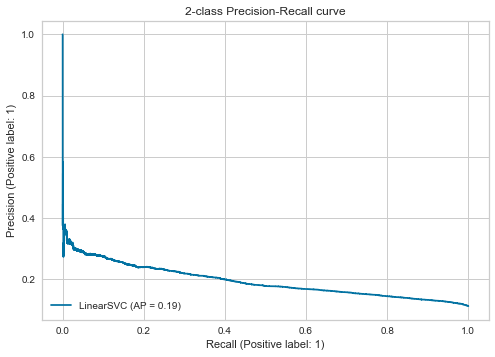

In [88]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

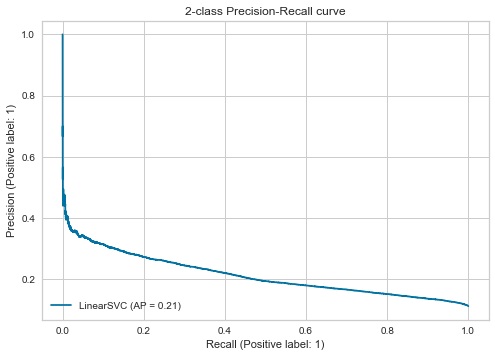

In [89]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf, X_train, y_train, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

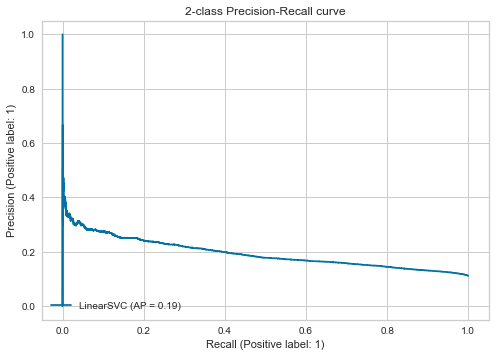

In [90]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf1, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

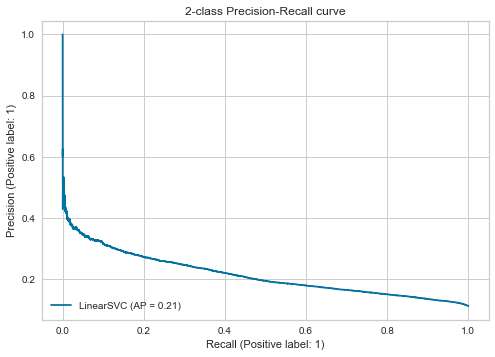

In [91]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf1, X_train, y_train, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [18]:
# Encode the categorical data
X = df_rf.drop(columns='Target')
y = df_rf['Target']

In [96]:
from yellowbrick.model_selection import ValidationCurve

In [97]:
rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf1 = RandomForestClassifier()

dict_keys(['ax', 'cv', 'estimator', 'groups', 'logx', 'n_jobs', 'param_name', 'param_range', 'pre_dispatch', 'scoring', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'random_state', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'logx', 'n_jobs', 'param_name', 'param_range', 'pre_dispatch', 'scoring', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'random_state', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'logx', 'n_jobs', 'param_name', 'param_range', 'pre_dispatch', 'scoring', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'm

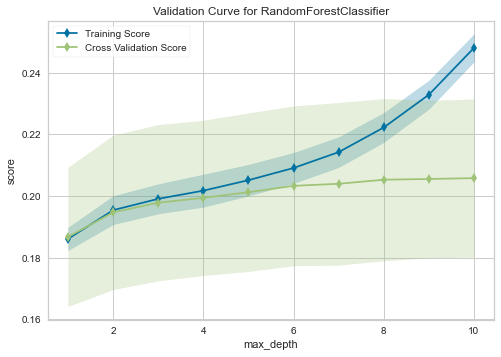

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [98]:
viz = ValidationCurve(
    rf_clf, param_name="max_depth",
    param_range=np.arange(1, 11), cv=6, scoring='average_precision'
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [15]:
import optuna

In [16]:
X.shape

(248012, 39)

In [18]:
def objective(trial):
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 16, log=True)
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 120, log=True)
    #rf_max_features = trial.suggest_int("rf_max_features", 2, 16, log=True)

    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, class_weight='balanced')

    score = cross_val_score(classifier_obj, X, y, scoring='average_precision', n_jobs=-1, cv=8)
    accuracy = score.mean()
    desviacion_cross = accuracy.std()
    return accuracy

In [19]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2022-04-25 09:52:42,815] A new study created in memory with name: no-name-66d10d94-17b7-4161-adf5-ef1ff940ca38
[I 2022-04-25 09:53:03,478] Trial 0 finished with value: 0.20356982137878657 and parameters: {'rf_max_depth': 8, 'rf_n_estimators': 13}. Best is trial 0 with value: 0.20356982137878657.
[I 2022-04-25 09:53:28,837] Trial 1 finished with value: 0.2050267909527615 and parameters: {'rf_max_depth': 8, 'rf_n_estimators': 31}. Best is trial 1 with value: 0.2050267909527615.
[I 2022-04-25 09:54:34,624] Trial 2 finished with value: 0.20593180054202503 and parameters: {'rf_max_depth': 10, 'rf_n_estimators': 66}. Best is trial 2 with value: 0.20593180054202503.
[I 2022-04-25 09:56:40,134] Trial 3 finished with value: 0.20402416160572376 and parameters: {'rf_max_depth': 13, 'rf_n_estimators': 107}. Best is trial 2 with value: 0.20593180054202503.
[I 2022-04-25 09:56:50,301] Trial 4 finished with value: 0.1995791905723424 and parameters: {'rf_max_depth': 5, 'rf_n_estimators': 17}. Best 

FrozenTrial(number=12, values=[0.20654120392432074], datetime_start=datetime.datetime(2022, 4, 25, 10, 0, 35, 107718), datetime_complete=datetime.datetime(2022, 4, 25, 10, 1, 11, 379462), params={'rf_max_depth': 10, 'rf_n_estimators': 38}, distributions={'rf_max_depth': IntLogUniformDistribution(high=16, low=2, step=1), 'rf_n_estimators': IntLogUniformDistribution(high=120, low=10, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=12, state=TrialState.COMPLETE, value=None)


In [23]:
rf_clf_opt = RandomForestClassifier(max_depth=10, n_estimators=38, class_weight='balanced')

In [24]:
X_train, X_test, y_train, y_test = modelado.particion(df_rf, 'Target', 0.25)

In [25]:
rf_clf_opt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=38)

In [26]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(rf_clf_opt, X_train, y_train, 8, 'roc_auc')

In [27]:
print(accuracies, media_cross, desviacion_cross)

[0.68279995 0.68219788 0.67328252 0.68648146 0.67753853 0.68201755
 0.6849692  0.69226566] 0.6826940933927623 0.005326909899001918


In [28]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(rf_clf_opt, X_test, y_test, 8, 'roc_auc')

In [29]:
print(accuracies, media_cross, desviacion_cross)

[0.64673972 0.64796244 0.66265691 0.65004663 0.66705102 0.6698794
 0.66135949 0.66958631] 0.6594102391295622 0.009118312762915864


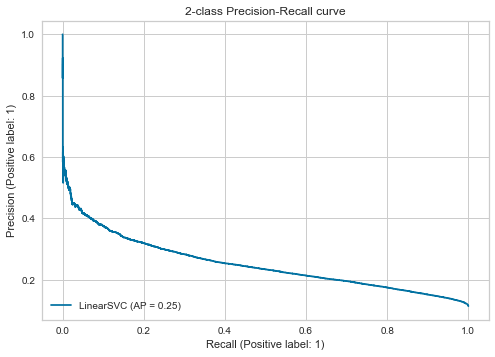

In [30]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf_opt, X_train, y_train, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

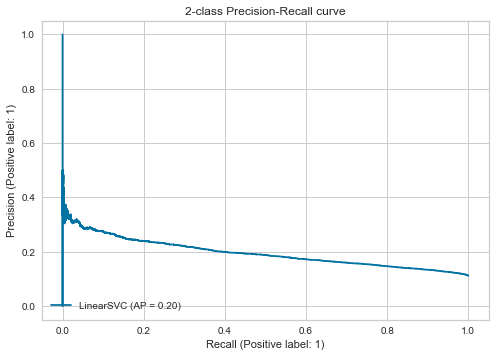

In [31]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf_opt, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [33]:
def objective(trial):
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 16, log=True)
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 120, log=True)
    rf_max_features = trial.suggest_int("rf_max_features", 6, 39, log=True)

    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, max_features=rf_max_features, class_weight='balanced')

    score = cross_val_score(classifier_obj, X, y, scoring='average_precision', n_jobs=-1, cv=8)
    accuracy = score.mean()
    return accuracy

In [34]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)
print(study.best_trial)

[I 2022-04-25 11:54:28,132] A new study created in memory with name: no-name-924882b7-33cc-4594-a691-066dfaf0f7e9
[I 2022-04-25 11:56:40,060] Trial 0 finished with value: 0.1998824609264544 and parameters: {'rf_max_depth': 15, 'rf_n_estimators': 70, 'rf_max_features': 7}. Best is trial 0 with value: 0.1998824609264544.
[I 2022-04-25 11:58:23,327] Trial 1 finished with value: 0.206208919830776 and parameters: {'rf_max_depth': 10, 'rf_n_estimators': 72, 'rf_max_features': 9}. Best is trial 1 with value: 0.206208919830776.
[I 2022-04-25 11:58:35,633] Trial 2 finished with value: 0.20196701736404218 and parameters: {'rf_max_depth': 6, 'rf_n_estimators': 11, 'rf_max_features': 10}. Best is trial 1 with value: 0.206208919830776.
[I 2022-04-25 11:58:51,757] Trial 3 finished with value: 0.19062036575007058 and parameters: {'rf_max_depth': 2, 'rf_n_estimators': 27, 'rf_max_features': 16}. Best is trial 1 with value: 0.206208919830776.
[I 2022-04-25 12:00:07,729] Trial 4 finished with value: 0.2

FrozenTrial(number=35, values=[0.20669863566644814], datetime_start=datetime.datetime(2022, 4, 25, 12, 40, 46, 755841), datetime_complete=datetime.datetime(2022, 4, 25, 12, 41, 45, 885917), params={'rf_max_depth': 10, 'rf_n_estimators': 60, 'rf_max_features': 8}, distributions={'rf_max_depth': IntLogUniformDistribution(high=16, low=2, step=1), 'rf_n_estimators': IntLogUniformDistribution(high=120, low=10, step=1), 'rf_max_features': IntLogUniformDistribution(high=39, low=6, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=35, state=TrialState.COMPLETE, value=None)


In [ ]:
{'rf_max_depth': 10, 'rf_n_estimators': 60, 'rf_max_features': 8}

In [35]:
rf_clf_opt1 = RandomForestClassifier(max_depth=10, n_estimators=60, max_features=8, class_weight='balanced')

In [36]:
rf_clf_opt1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       n_estimators=60)

In [37]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(rf_clf_opt1, X_train, y_train, 8, 'roc_auc')

In [38]:
print(accuracies, media_cross, desviacion_cross)

[0.6831901  0.68279265 0.67594902 0.68717517 0.6781388  0.68306284
 0.68635751 0.69164107] 0.6835383955198686 0.004670181624014897


In [39]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(rf_clf_opt1, X_test, y_test, 8, 'roc_auc')

In [40]:
print(accuracies, media_cross, desviacion_cross)

[0.6450993  0.64889841 0.66482299 0.65089602 0.6691081  0.67058496
 0.66447207 0.67125518] 0.6606421277943779 0.009936035972981119


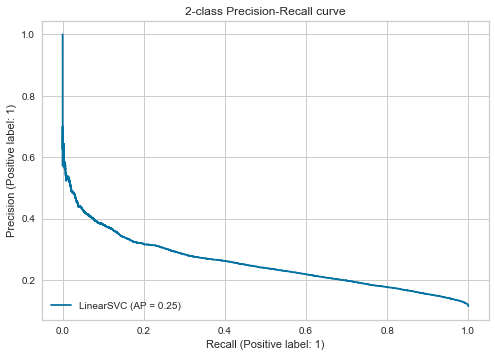

In [41]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf_opt1, X_train, y_train, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

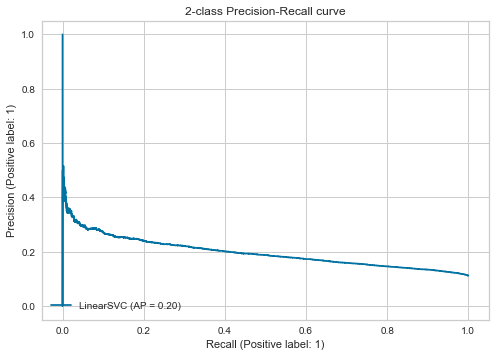

In [42]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf_opt1, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [16]:
def objective(trial):
    rf_max_features = trial.suggest_int("rf_max_features", 6, 39, log=True)

    classifier_obj = RandomForestClassifier(max_depth=10, n_estimators=38, max_features=rf_max_features, class_weight='balanced')

    score = cross_val_score(classifier_obj, X, y, scoring='average_precision', n_jobs=-1, cv=8)
    accuracy = score.mean()
    desviacion_cross = accuracy.std()
    return accuracy

In [19]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)
print(study.best_trial)

[I 2022-04-26 08:43:06,340] A new study created in memory with name: no-name-d50e7544-8d6c-4f5d-8424-37bc1277a00a
[I 2022-04-26 08:44:28,776] Trial 0 finished with value: 0.20569061536779654 and parameters: {'rf_max_features': 14}. Best is trial 0 with value: 0.20569061536779654.
[I 2022-04-26 08:45:43,363] Trial 1 finished with value: 0.20522343701296675 and parameters: {'rf_max_features': 15}. Best is trial 0 with value: 0.20569061536779654.
[I 2022-04-26 08:46:46,880] Trial 2 finished with value: 0.20525905870776778 and parameters: {'rf_max_features': 12}. Best is trial 0 with value: 0.20569061536779654.
[I 2022-04-26 08:47:34,032] Trial 3 finished with value: 0.20553083740606445 and parameters: {'rf_max_features': 8}. Best is trial 0 with value: 0.20569061536779654.
[I 2022-04-26 08:48:20,606] Trial 4 finished with value: 0.20603786788854805 and parameters: {'rf_max_features': 8}. Best is trial 4 with value: 0.20603786788854805.
[I 2022-04-26 08:49:06,489] Trial 5 finished with val

FrozenTrial(number=21, values=[0.20671576693924404], datetime_start=datetime.datetime(2022, 4, 26, 9, 6, 28, 796009), datetime_complete=datetime.datetime(2022, 4, 26, 9, 7, 14, 149228), params={'rf_max_features': 8}, distributions={'rf_max_features': IntLogUniformDistribution(high=39, low=6, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=21, state=TrialState.COMPLETE, value=None)


In [20]:
rf_clf_opt2 = RandomForestClassifier(max_depth=10, n_estimators=38, max_features=8, class_weight='balanced')
rf_clf_opt2.fit(X_train, y_train)
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(rf_clf_opt2, X_train, y_train, 8, 'roc_auc')

In [21]:
print(accuracies, media_cross, desviacion_cross)

[0.68235623 0.68175252 0.67583554 0.68780815 0.67567283 0.68304069
 0.68630782 0.69085741] 0.6829538983387978 0.005034520581597387


In [22]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(rf_clf_opt2, X_test, y_test, 8, 'roc_auc')

In [23]:
print(accuracies, media_cross, desviacion_cross)

[0.64647379 0.64540737 0.66413448 0.64704671 0.66358952 0.66732244
 0.65945118 0.67034997] 0.6579719339336751 0.009498726664430641


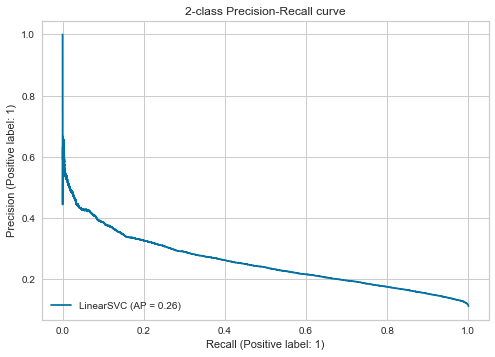

In [24]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf_opt2, X_train, y_train, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

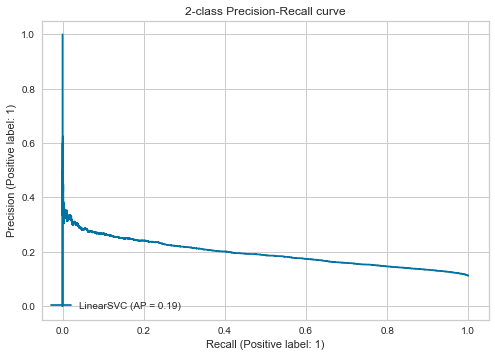

In [25]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf_opt2, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [26]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
import matplotlib
import matplotlib.pyplot as plt

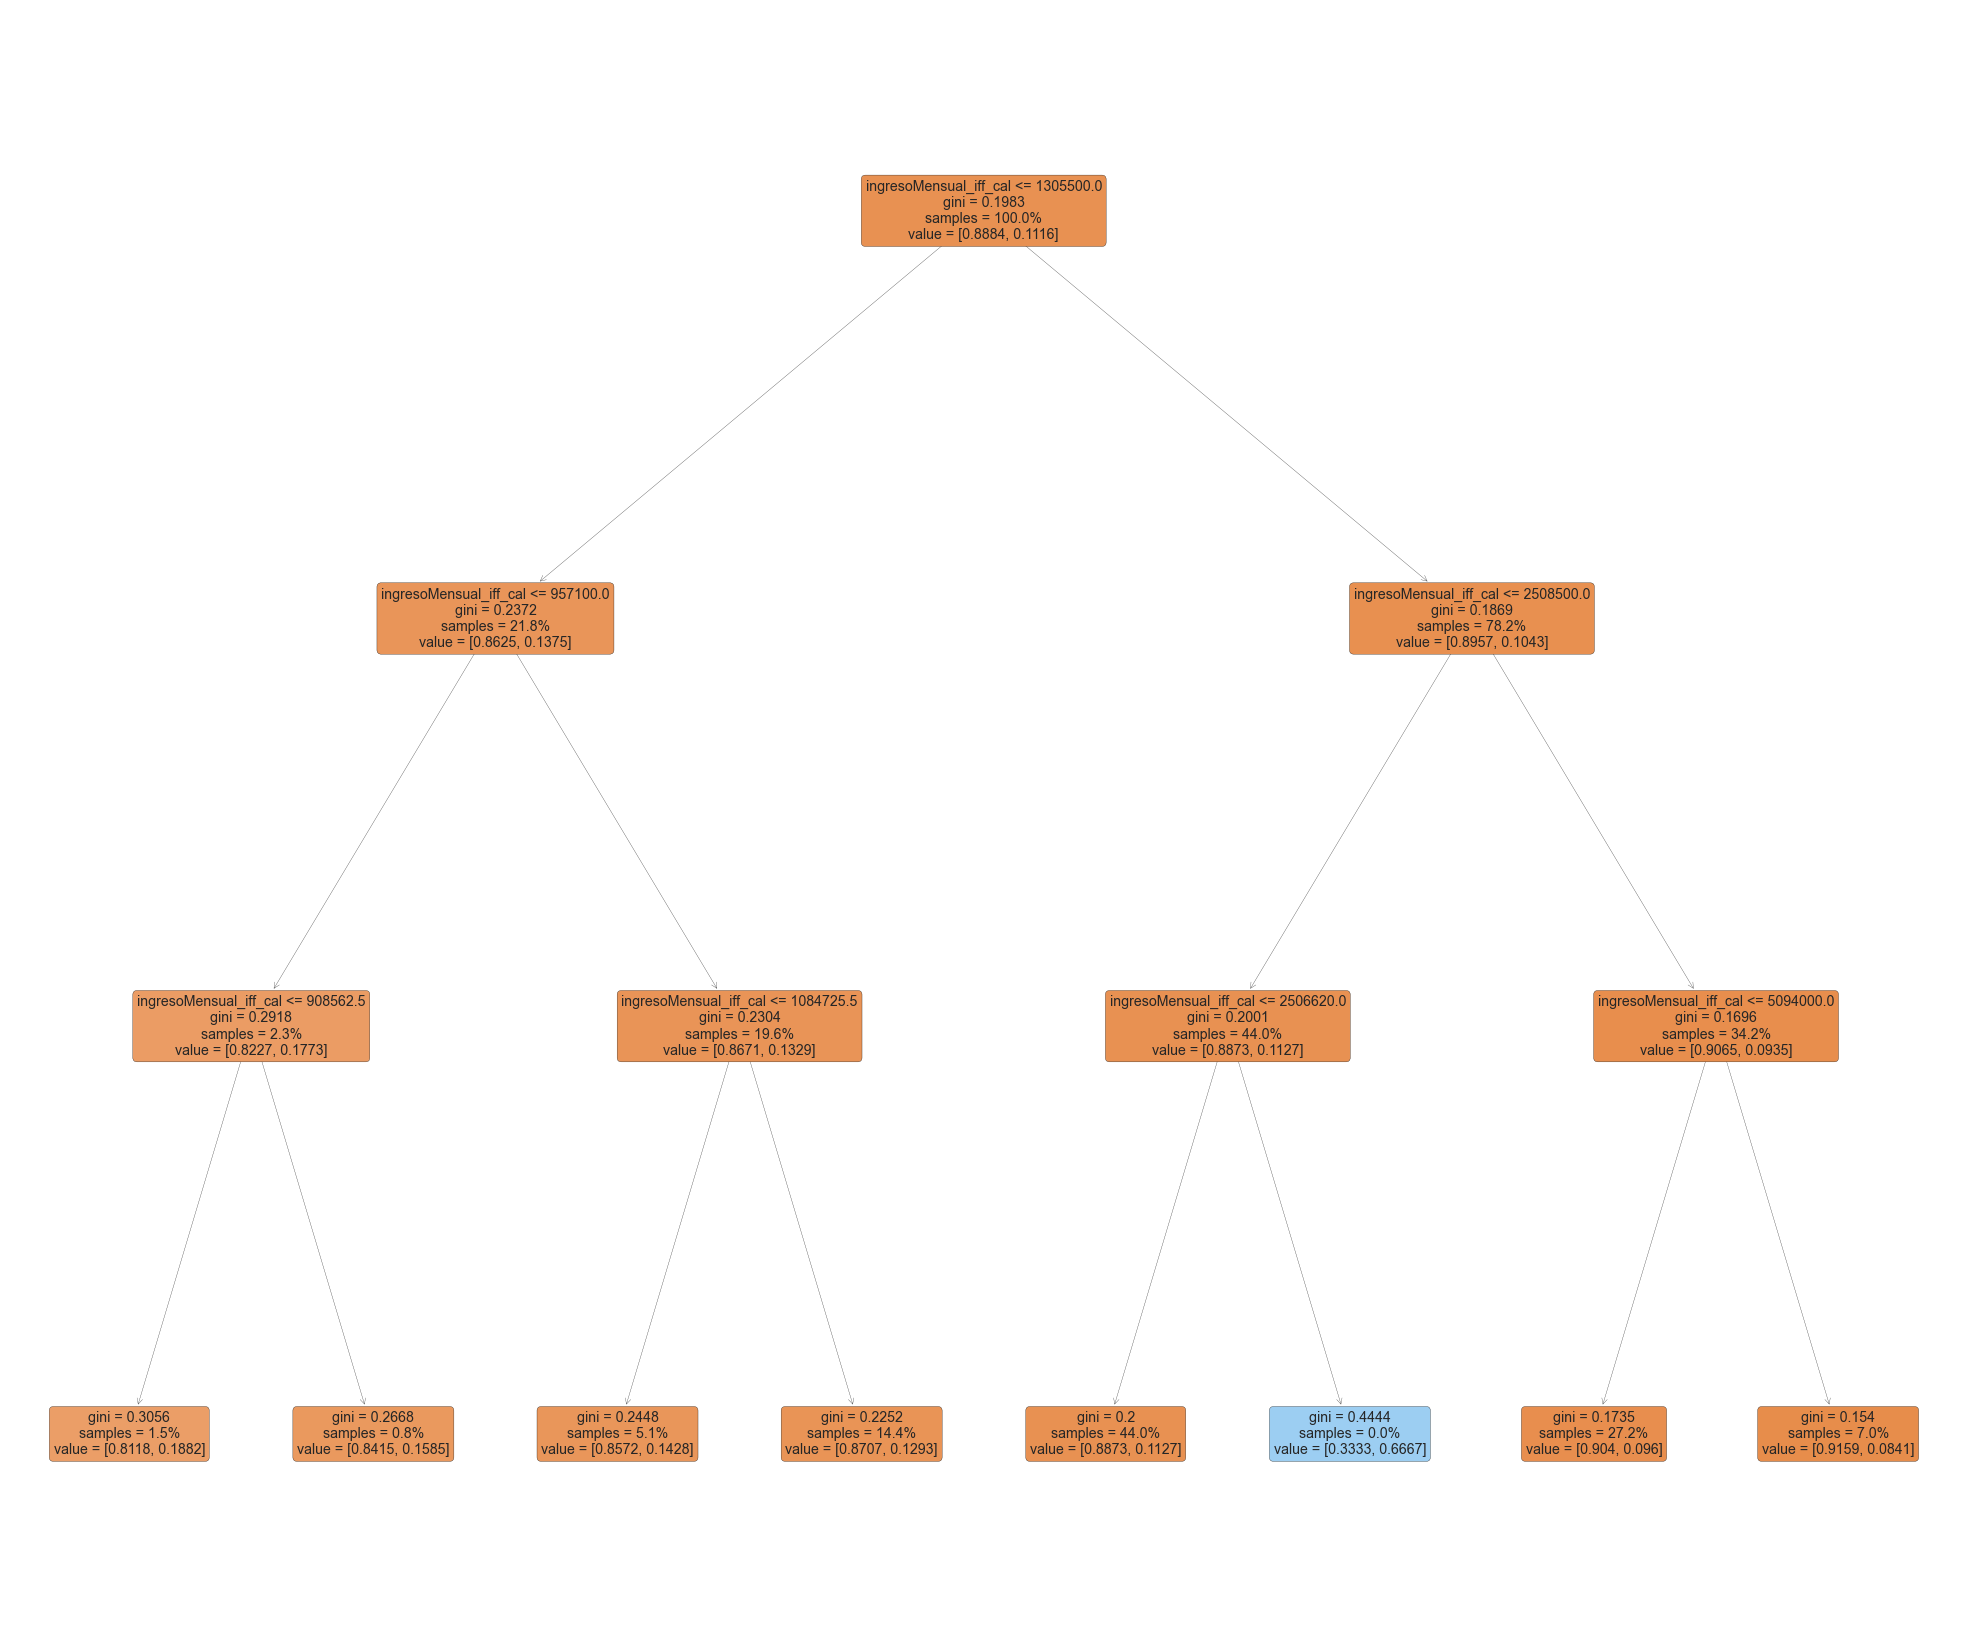

In [47]:
arbol = DecisionTreeClassifier(max_depth=3)
lista = []
plt.figure(figsize = (35,30))
for i in num_var:
    arbol.fit(base[[i]],base[['Target']])
    plot_tree(arbol, filled = True , precision = 4, rounded = True, proportion=True, feature_names=[i])
    lista.append(export_text(arbol,feature_names=[i]))
    plot_tree(arbol, filled = True , precision = 4, rounded = True, proportion=True, feature_names=[i])
    plt.savefig(fname=i)

In [13]:
base_catg = base.copy()

In [14]:
print(num_var)

['Porcn_gasto_cal', 'Score_cal', 'Meses_Primera_Solicitud', 'numeropersonasdependientes_cal', 'VlrPago_Vencimiento_SMMLV_cal', 'ipDistanceKm', 'puntajeDS', 'EAScore', 'ingresoMensual_iff_cal', 'plazoSolicitado', 'estadomovil']


In [15]:
# 1. ingresoMensual_iff_cal
base_catg['ingresoMensual_iff_cal'] = np.where(base_catg['ingresoMensual_iff_cal']<=957100 , 'A'
                                              ,(np.where((base_catg['ingresoMensual_iff_cal']>957100) & (base_catg['ingresoMensual_iff_cal']<=1305500) , 'B'
                                              ,np.where((base_catg['ingresoMensual_iff_cal']>1305500) & (base_catg['ingresoMensual_iff_cal']<=2508500) , 'C'
                                              ,np.where(base_catg['ingresoMensual_iff_cal']>2508500 , 'D', 'NA')))))
# 2. ipDistanceKm
base_catg['ipDistanceKm'] = np.where(base_catg['ipDistanceKm']<0 , 'A'
                                    ,(np.where(base_catg['ipDistanceKm']==0 , 'B'
                                    ,np.where((base_catg['ipDistanceKm']>0) & (base_catg['ipDistanceKm']<=3) , 'C'
                                    ,np.where(base_catg['ipDistanceKm']>3 , 'D', 'NA')))))
# 3. Meses_Primera_Solicitud
base_catg['Meses_Primera_Solicitud'] = np.where(base_catg['Meses_Primera_Solicitud']<=0 , 'A'
                                               ,(np.where((base_catg['Meses_Primera_Solicitud']>0) & (base_catg['Meses_Primera_Solicitud']<=3) , 'B'
                                               ,np.where((base_catg['Meses_Primera_Solicitud']>3) & (base_catg['Meses_Primera_Solicitud']<=41) , 'C'
                                               ,np.where(base_catg['Meses_Primera_Solicitud']>41 , 'D' , 'NA')))))
# 4. numeropersonasdependientes_cal 
base_catg['numeropersonasdependientes_cal'] = np.where(base_catg['numeropersonasdependientes_cal']==0 , 'A'
                                                      ,(np.where(base_catg['numeropersonasdependientes_cal']==1 , 'B'
                                                      ,np.where(base_catg['numeropersonasdependientes_cal']==2 , 'C'
                                                      ,np.where(base_catg['numeropersonasdependientes_cal']==3 , 'D'
                                                      ,np.where(base_catg['numeropersonasdependientes_cal']>3 , 'E', 'NA'))))))
# 5. plazoSolicitado
base_catg['plazoSolicitado'] = np.where(base_catg['plazoSolicitado']<=14 , 'A'
                                       ,(np.where((base_catg['plazoSolicitado']>14) & (base_catg['plazoSolicitado']<=25) , 'B'
                                       ,np.where((base_catg['plazoSolicitado']>25) & (base_catg['plazoSolicitado']<=27) , 'C'
                                       ,np.where(base_catg['plazoSolicitado']>27 , 'D', 'NA')))))
# 6. Porcn_gasto_cal
base_catg['Porcn_gasto_cal'] = np.where(base_catg['Porcn_gasto_cal']<=0.22 , 'A'
                                       ,(np.where((base_catg['Porcn_gasto_cal']>0.22) & (base_catg['Porcn_gasto_cal']<=0.28) , 'B'
                                       ,np.where((base_catg['Porcn_gasto_cal']>0.28) & (base_catg['Porcn_gasto_cal']<=0.49) , 'C'
                                       ,np.where((base_catg['Porcn_gasto_cal']>0.49) & (base_catg['Porcn_gasto_cal']<=0.87) , 'D'
                                       ,np.where(base_catg['Porcn_gasto_cal']>0.87 , 'E', 'NA'))))))
# 7. Score_cal
base_catg['Score_cal'] = np.where(base_catg['Score_cal']<=223 , 'A'
                                 ,(np.where((base_catg['Score_cal']>223) & (base_catg['Score_cal']<=542) , 'B'
                                 ,np.where((base_catg['Score_cal']>542) & (base_catg['Score_cal']<=567) , 'C'
                                 ,np.where((base_catg['Score_cal']>567) & (base_catg['Score_cal']<=639) , 'D'
                                 ,np.where(base_catg['Score_cal']>639 , 'E', 'NA'))))))
# 8. VlrPago_Vencimiento_SMMLV_cal
base_catg['VlrPago_Vencimiento_SMMLV_cal'] = np.where(base_catg['VlrPago_Vencimiento_SMMLV_cal']<=0.18 , 'A'
                                                     ,(np.where((base_catg['VlrPago_Vencimiento_SMMLV_cal']>0.18) & (base_catg['VlrPago_Vencimiento_SMMLV_cal']<=0.29) , 'B'
                                                     ,np.where((base_catg['VlrPago_Vencimiento_SMMLV_cal']>0.29) & (base_catg['VlrPago_Vencimiento_SMMLV_cal']<=0.31) , 'C'
                                                     ,np.where(base_catg['VlrPago_Vencimiento_SMMLV_cal']>0.31 , 'D' , 'NA')))))
# 9. estadomovil
base_catg['estadomovil'] = np.where(base_catg['estadomovil']<=1 , 'A'
                                   ,(np.where((base_catg['estadomovil']>1) & (base_catg['estadomovil']<=4) , 'B'
                                   ,np.where((base_catg['estadomovil']>4) & (base_catg['estadomovil']<=9) , 'C'
                                   ,np.where(base_catg['estadomovil']>9 , 'D', 'NA')))))
# 10. EAScore
base_catg['EAScore'] = np.where(base_catg['EAScore']<=4 , 'A'
                               ,(np.where((base_catg['EAScore']>4) & (base_catg['EAScore']<=126) , 'B'
                               ,np.where((base_catg['EAScore']>126) & (base_catg['EAScore']<=230) , 'C'
                               ,np.where(base_catg['EAScore']>230 , 'D', 'NA')))))

In [16]:
base[num_var].describe().round(2)

Porcn_gasto_cal  Score_cal  Meses_Primera_Solicitud  \
count        248012.00  248012.00                248012.00   
mean              0.41     430.46                    19.12   
std               0.25     288.76                    19.61   
min               0.03      -1.00                     0.00   
25%               0.25      -1.00                     2.00   
50%               0.38     572.00                    13.00   
75%               0.52     640.00                    31.00   
max              11.11     894.00                   623.00   

       numeropersonasdependientes_cal  VlrPago_Vencimiento_SMMLV_cal  \
count                       248012.00                      248012.00   
mean                             0.85                           0.31   
std                              0.98                           0.09   
min                              0.00                           0.00   
25%                              0.00                           0.28   
50%                              1.00                           0.31   
75%                              1.00                           0.31   
max                             10.00                           1.03   

       ipDistanceKm  puntajeDS    EAScore  ingresoMensual_iff_cal  \
count     248012.00  248012.00  248012.00               248012.00   
mean          69.13    -403.29     195.65              2552444.53   
std          254.66     489.51     198.70              1680486.12   
min           -1.00    -997.00      -1.00               450000.00   
25%            0.00    -992.00      55.00              1400000.00   
50%            0.00       1.00     130.00              2000000.00   
75%           18.00       1.00     248.00              3000000.00   
max        16833.00    9999.00     997.00             10000000.00   

       plazoSolicitado  estadomovil  
count        248012.00    248012.00  
mean             27.06         5.45  
std               6.50         3.44  
min               5.00         0.00  
25%              30.00         4.00  
50%              30.00         4.00  
75%              30.00         9.00  
max             100.00        11.00

In [17]:
base_catg

puntajeDS Sistema_Operativo estadomovil ingresoMensual_iff_cal  \
0             1.0           Android           C                      C   
1             1.0             Apple           C                      C   
2          -996.0           Android           B                      D   
3          -992.0           Android           B                      C   
4             1.0           Android           C                      A   
...           ...               ...         ...                    ...   
248007     -991.0              Otro           D                      D   
248008     -992.0           Android           D                      D   
248009     -996.0             Apple           D                      C   
248010        1.0           Android           D                      B   
248011        1.0           Android           D                      B   

       EAScore Ciudad_catg ipDistanceKm Departamento_IP  \
0            D      BOGOTA            B          BOGOTA   
1            B        OTRO            C            OTRO   
2            C        OTRO            D          BOGOTA   
3            B      BOGOTA            B          BOGOTA   
4            D        OTRO            D          BOGOTA   
...        ...         ...          ...             ...   
248007       C      BOGOTA            B           Vacio   
248008       A      BOGOTA            A          BOGOTA   
248009       B        OTRO            B       ATLANTICO   
248010       A    MEDELLIN            A       ANTIOQUIA   
248011       A      BOGOTA            A          BOGOTA   

       VlrPago_Vencimiento_SMMLV_cal plazoSolicitado Meses_Primera_Solicitud  \
0                                  C               D                       A   
1                                  D               D                       A   
2                                  C               B                       C   
3                                  B               B                       C   
4                                  C               D                       A   
...                              ...             ...                     ...   
248007                             B               D                       C   
248008                             B               D                       C   
248009                             B               D                       C   
248010                             B               D                       D   
248011                             B               D                       D   

       Porcn_gasto_cal Tipo_Cliente nivelEstudio_catg  \
0                    C        Nuevo         Bachiller   
1                    D        Nuevo          Pregrado   
2                    C   Recurrente         Tecnologo   
3                    C        Nuevo          Pregrado   
4                    D        Nuevo           Tecnico   
...                ...          ...               ...   
248007               C        Nuevo         Tecnologo   
248008               A   Recurrente         Tecnologo   
248009               D   Recurrente          Posgrado   
248010               C   Recurrente          Pregrado   
248011               B   Recurrente         Tecnologo   

       numeropersonasdependientes_cal Score_cal   documento  credito_id  \
0                                   B         E    80140622      951740   
1                                   A         B  1065645849      953039   
2                                   C         D  1080295881      955797   
3                                   A         D  1018407865      955907   
4                                   B         D  1057605999      957197   
...                               ...       ...         ...         ...   
248007                              B         E    52090692     1437965   
248008                              B         C  1022388444     1437971   
248009                              B         D  1124527461     1437972   
248010        

In [18]:
df_catg_bivariado = analisis.bivariado(base_catg, campos, 'Target')

In [20]:
df_catg_bivariado.tail(35)

Variable         Value     All    Good    Bad  \
51                    estadomovil             A   37086   34303   2783   
52                    estadomovil             B  118897  106706  12191   
53                    estadomovil             D   54479   47853   6626   
54                    estadomovil             C   37550   31474   6076   
55                    Ciudad_catg        BOGOTA   91505   83780   7725   
56                    Ciudad_catg  CUNDINAMARCA   13201   12036   1165   
57                    Ciudad_catg     ATLANTICO    8465    7604    861   
58                    Ciudad_catg          OTRO   73548   64652   8896   
59                    Ciudad_catg          CALI   15876   13929   1947   
60                    Ciudad_catg     ANTIOQUIA   11129    9423   1706   
61                    Ciudad_catg      MEDELLIN   34288   28912   5376   
62  VlrPago_Vencimiento_SMMLV_cal             A    6766    6412    354   
63  VlrPago_Vencimiento_SMMLV_cal             D   21892   20683   1209   
64  VlrPago_Vencimiento_SMMLV_cal             B   67436   61110   6326   
65  VlrPago_Vencimiento_SMMLV_cal             C  151918  132131  19787   
66                      puntajeDS           0.0       3       3      0   
67                      puntajeDS        9999.0       3       3      0   
68                      puntajeDS         430.0       1       1      0   
69                      puntajeDS           1.0  147041  134204  12837   
70                      puntajeDS        -995.0     104      94     10   
71                      puntajeDS        -991.0    3918    3477    441   
72                      puntajeDS        -996.0   30991   27103   3888   
73                      puntajeDS        -997.0     294     254     40   
74                      puntajeDS        -989.0   14679   12369   2310   
75                      puntajeDS        -992.0   46804   39416   7388   
76                      puntajeDS        -990.0    4142    3387    755   
77                      puntajeDS        -988.0       5       4      1   
78                      puntajeDS          -1.0      27      21      6   
79                      Score_cal             A   74492   68359   6133   
80                      Score_cal             E   64629   59199   5430   
81                      Score_cal             D   62750   55135   7615   
82                      Score_cal             C   15633   13228   2405   
83                      Score_cal             B   30508   24415   6093   
84                   Tipo_Cliente    Recurrente  157537  144924  12613   
85                   Tipo_Cliente         Nuevo   90475   75412  15063   

       Share  Bad Rate  Distribution Good  Distribution Bad       WoE  \
51  0.149533  0.075042           0.155685          0.100556  0.437115   
52  0.479400  0.102534           0.484288          0.440490  0.094791   
53  0.219663  0.121625           0.217182          0.239413 -0.097456   
54  0.151404  0.161811           0.142845          0.219540 -0.429773   
55  0.368954  0.084422           0.380237          0.279123  0.309144   
56  0.053227  0.088251           0.054626          0.042094  0.260593   
57  0.034131  0.101713           0.034511          0.031110  0.103747   
58  0.296550  0.120955           0.293425          0.321434 -0.091171   
59  0.064013  0.122638           0.063217          0.070350 -0.106905   
60  0.044873  0.153293           0.042767          0.061642 -0.365586   
61  0.138251  0.156790           0.131218          0.194248 -0.392276   
62  0.027281  0.052320           0.029101          0.012791  0.822042   
63  0.088270  0.055226           0.093870          0.043684  0.764930   
64  0.271906  0.093807           0.277349          0.228573  0.193419   
65  0.612543  0.130248           0.599680          0.714952 -0.175819   
66  0.000012  0.000000           0.000014          0.000000  0.000000   
67  0.000012  0.000000           0.000014          0.000000  0.000000   
68  0.000004  0.000000           0.000005     

In [38]:
datos.guardar('no', 'Informes', 'Bivariado_Categorias', df_catg_bivariado)

In [19]:
encoder = ce.WOEEncoder(cols=campos[:-1])

In [20]:
encoder.fit(base_catg[campos[:-1]],base_catg["Target"])

WOEEncoder(cols=['puntajeDS', 'Sistema_Operativo', 'estadomovil',
                 'ingresoMensual_iff_cal', 'EAScore', 'Ciudad_catg',
                 'ipDistanceKm', 'Departamento_IP',
                 'VlrPago_Vencimiento_SMMLV_cal', 'plazoSolicitado',
                 'Meses_Primera_Solicitud', 'Porcn_gasto_cal', 'Tipo_Cliente',
                 'nivelEstudio_catg', 'numeropersonasdependientes_cal',
                 'Score_cal'])

In [21]:
Pkl_Filename = "../Modelo/Encoder_WOE_DA.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(encoder, file)

In [23]:
X_cleaned = encoder.transform(base_catg[campos[:-1]]).round(2)

In [24]:
X_cleaned

puntajeDS  Sistema_Operativo  estadomovil  ingresoMensual_iff_cal  \
0           -0.27               0.06         0.43                    0.01   
1           -0.27               0.05         0.43                    0.01   
2            0.13               0.06        -0.09                   -0.20   
3            0.40               0.06        -0.09                    0.01   
4           -0.27               0.06         0.43                    0.54   
...           ...                ...          ...                     ...   
248007       0.01               0.48         0.10                   -0.20   
248008       0.40               0.06         0.10                   -0.20   
248009       0.13               0.05         0.10                    0.01   
248010      -0.27               0.06         0.10                    0.20   
248011      -0.27               0.06         0.10                    0.20   

        EAScore  Ciudad_catg  ipDistanceKm  Departamento_IP  \
0          0.21        -0.31         -0.17            -0.24   
1         -0.06         0.09          0.22             0.02   
2          0.08         0.09          0.23            -0.24   
3         -0.06        -0.31         -0.17            -0.24   
4          0.21         0.09          0.23            -0.24   
...         ...          ...           ...              ...   
248007     0.08        -0.31         -0.17             0.44   
248008    -0.37        -0.31         -0.36            -0.24   
248009    -0.06         0.09         -0.17             0.09   
248010    -0.37         0.39         -0.36             0.30   
248011    -0.37        -0.31         -0.36            -0.24   

        VlrPago_Vencimiento_SMMLV_cal  plazoSolicitado  \
0                                0.18             0.10   
1                               -0.76             0.10   
2                                0.18            -0.41   
3                               -0.19            -0.41   
4                                0.18             0.10   
...                               ...              ...   
248007                          -0.19             0.10   
248008                          -0.19             0.10   
248009                          -0.19             0.10   
248010                          -0.19             0.10   
248011                          -0.19             0.10   

        Meses_Primera_Solicitud  Porcn_gasto_cal  Tipo_Cliente  \
0                          0.33             0.01          0.46   
1                          0.33             0.11          0.46   
2                         -0.08             0.01         -0.37   
3                         -0.08             0.01          0.46   
4                          0.33             0.11          0.46   
...                         ...              ...           ...   
248007                    -0.08             0.01          0.46   
248008                    -0.08            -0.24         -0.37   
248009                    -0.08             0.11         -0.37   
248010                    -0.24             0.01         -0.37   
248011                    -0.24            -0.05         -0.37   

        nivelEstudio_catg  numeropersonasdependientes_cal  Score_cal  
0                    0.20                            0.05      -0.31  
1                   -0.17                           -0.09       0.69  
2                   -0.03                            0.08       0.09  
3                   -0.17                           -0.09       0.09  
4                    0.10                            0.05       0.09  
...                   ...                             ...        ...  
248007              -0.03                            0.05      -0.31  
248008              -0.03                            0.05       0.37  
248009              -0.28                            0.05       0.09  
248010              -0.17                            0.08      -0.31  
248011              -0.03                           -0.

In [25]:
base_woe = pd.concat([X_cleaned, base_catg[["Target"]]], axis=1)

In [26]:
base_woe.head()

puntajeDS  Sistema_Operativo  estadomovil  ingresoMensual_iff_cal  EAScore  \
0      -0.27               0.06         0.43                    0.01     0.21   
1      -0.27               0.05         0.43                    0.01    -0.06   
2       0.13               0.06        -0.09                   -0.20     0.08   
3       0.40               0.06        -0.09                    0.01    -0.06   
4      -0.27               0.06         0.43                    0.54     0.21   

   Ciudad_catg  ipDistanceKm  Departamento_IP  VlrPago_Vencimiento_SMMLV_cal  \
0        -0.31         -0.17            -0.24                           0.18   
1         0.09          0.22             0.02                          -0.76   
2         0.09          0.23            -0.24                           0.18   
3        -0.31         -0.17            -0.24                          -0.19   
4         0.09          0.23            -0.24                           0.18   

   plazoSolicitado  Meses_Primera_Solicitud  Porcn_gasto_cal  Tipo_Cliente  \
0             0.10                     0.33             0.01          0.46   
1             0.10                     0.33             0.11          0.46   
2            -0.41                    -0.08             0.01         -0.37   
3            -0.41                    -0.08             0.01          0.46   
4             0.10                     0.33             0.11          0.46   

   nivelEstudio_catg  numeropersonasdependientes_cal  Score_cal  Target  
0               0.20                            0.05      -0.31       0  
1              -0.17                           -0.09       0.69       1  
2              -0.03                            0.08       0.09       0  
3              -0.17                           -0.09       0.09       0  
4               0.10                            0.05       0.09       0

In [27]:
X_train, X_test, y_train, y_test = modelado.particion(base_woe[campos], 'Target', 0.25)

In [28]:
log_test = LogisticRegression(penalty='l2', solver='lbfgs', C=1, random_state=34 ,verbose=2 ,n_jobs=-1)

In [29]:
log_test.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.0s finished


LogisticRegression(C=1, n_jobs=-1, random_state=34, verbose=2)

In [30]:
log_test_odds = log_test.coef_[0]
test_coef = pd.DataFrame(log_test_odds,base_woe[campos[:-1]].columns, columns=['coef'])\
            .sort_values(by='coef', ascending=False)

In [31]:
test_coef

coef
Ciudad_catg                     0.882317
plazoSolicitado                 0.825488
Tipo_Cliente                    0.631964
VlrPago_Vencimiento_SMMLV_cal   0.520219
Sistema_Operativo               0.514794
puntajeDS                       0.474847
estadomovil                     0.437934
Score_cal                       0.425709
Porcn_gasto_cal                 0.407222
EAScore                         0.345403
Departamento_IP                 0.309227
numeropersonasdependientes_cal  0.244935
nivelEstudio_catg               0.016693
ingresoMensual_iff_cal         -0.012478
Meses_Primera_Solicitud        -0.242163
ipDistanceKm                   -0.299982

In [32]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(log_test, X_test, y_test, 8, 'roc_auc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

In [33]:
print(accuracies, media_cross, desviacion_cross)

[0.65653164 0.66133027 0.66119638 0.65198494 0.67016308 0.67624391
 0.66381226 0.66855323] 0.6637269639514458 0.007273183012505773


In [52]:
print(accuracies, media_cross, desviacion_cross)

[0.65653164 0.66133027 0.66119638 0.65198494 0.67016308 0.67624391
 0.66381226 0.66855323] 0.6637269639514458 0.007273183012505773


In [34]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(log_test, X_train, y_train, 8, 'roc_auc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

In [35]:
print(accuracies, media_cross, desviacion_cross)

[0.67908279 0.67587562 0.67061816 0.67817856 0.67227652 0.68239878
 0.6786916  0.68459681] 0.6777148566329345 0.004411097744028604


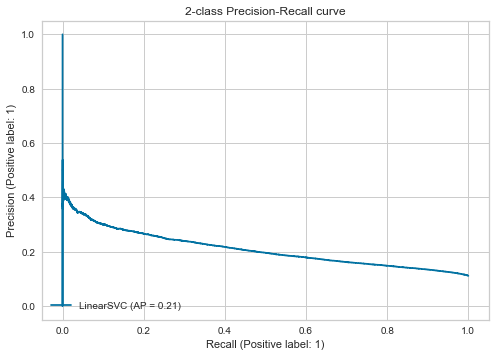

In [36]:
display = PrecisionRecallDisplay.from_estimator(
    log_test, X_train, y_train, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

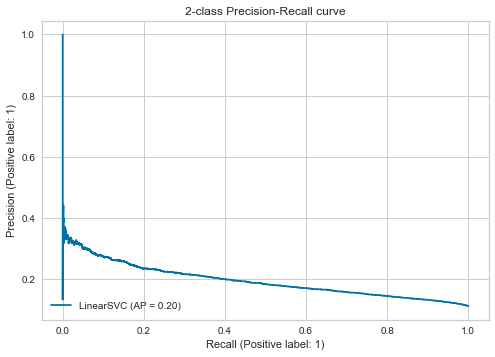

In [37]:
display = PrecisionRecallDisplay.from_estimator(
    log_test, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [38]:
train_pred1, test_pred1 = modelado.calificacion('si', log_test, X_train, X_test, y_train, y_test)

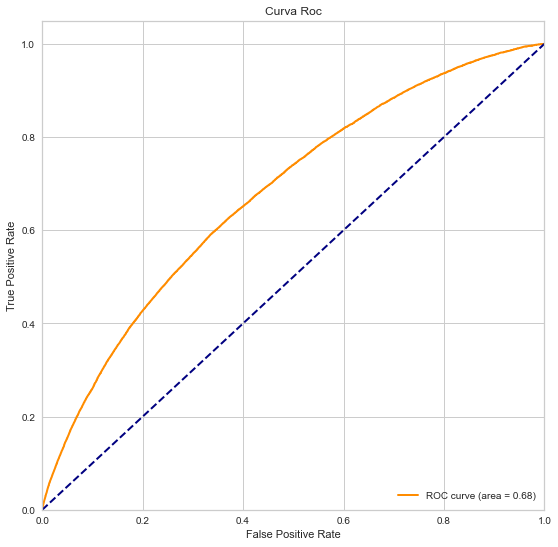


*************************************************************

El coeficiente de GINI es: 0.36

El área por debajo de la curva ROC es: 0.68

*************************************************************


0

In [39]:
modelado.plot_roc_gini(train_pred1.Target, train_pred1.probabilidad)

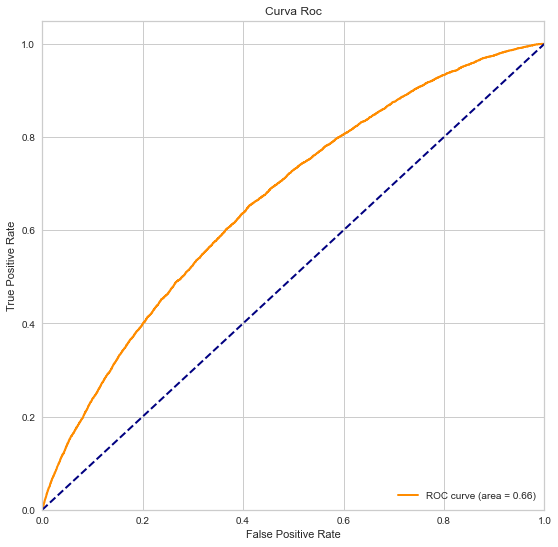


*************************************************************

El coeficiente de GINI es: 0.33

El área por debajo de la curva ROC es: 0.66

*************************************************************


0

In [40]:
modelado.plot_roc_gini(test_pred1.Target, test_pred1.probabilidad)

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

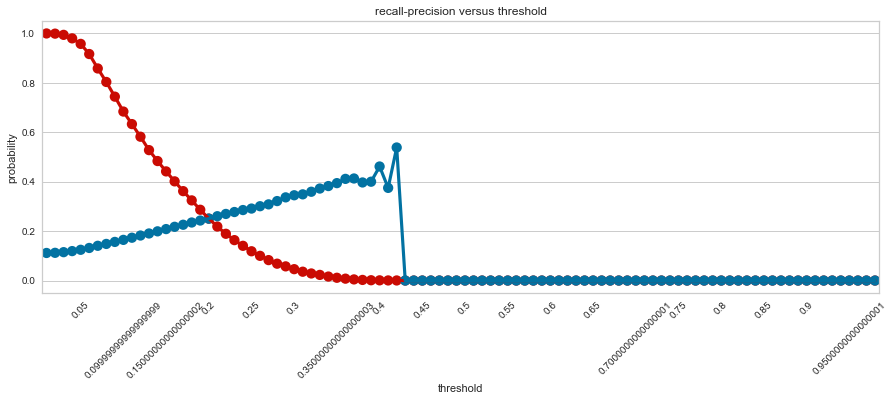

In [41]:
modelado.plot_recall_precission(train_pred1, 'Target')

In [99]:
train_pred1

puntajeDS  Sistema_Operativo  estadomovil  ingresoMensual_iff_cal  \
127719      -0.27               0.06         0.10                    0.01   
188182       0.13               0.05        -0.09                    0.01   
164356      -0.27              -0.30        -0.44                    0.01   
6895         0.40               0.06        -0.09                    0.01   
149165      -0.27               0.06         0.43                    0.20   
...           ...                ...          ...                     ...   
234502       0.40               0.06        -0.09                   -0.20   
124655      -0.27               0.06         0.10                   -0.20   
217942      -0.27              -0.37        -0.09                   -0.20   
230940      -0.27              -0.30        -0.44                   -0.20   
197617      -0.27               0.06        -0.44                   -0.20   

        EAScore  Ciudad_catg  ipDistanceKm  Departamento_IP  \
127719    -0.37        -0.26         -0.36             0.30   
188182    -0.06         0.09          0.23             0.09   
164356    -0.06         0.39          0.23             0.30   
6895       0.21         0.09         -0.17            -0.24   
149165     0.08        -0.26         -0.17            -0.24   
...         ...          ...           ...              ...   
234502    -0.06        -0.31         -0.17            -0.24   
124655    -0.06        -0.31         -0.17            -0.24   
217942    -0.06         0.11          0.23            -0.24   
230940    -0.37         0.39         -0.36             0.30   
197617    -0.37         0.09         -0.36             0.02   

        VlrPago_Vencimiento_SMMLV_cal  plazoSolicitado  \
127719                           0.18              0.1   
188182                           0.18              0.1   
164356                           0.18              0.1   
6895                             0.18              0.1   
149165                           0.18              0.1   
...                               ...              ...   
234502                          -0.76              0.1   
124655                           0.18              0.1   
217942                           0.18              0.1   
230940                          -0.19              0.1   
197617                           0.18              0.1   

        Meses_Primera_Solicitud  Porcn_gasto_cal  Tipo_Cliente  \
127719                    -0.08             0.11         -0.37   
188182                    -0.08             0.01          0.46   
164356                    -0.08             0.01         -0.37   
6895                      -0.08             0.01         -0.37   
149165                     0.33             0.11          0.46   
...                         ...              ...           ...   
234502                    -0.08             0.01         -0.37   
124655                    -0.08            -0.24         -0.37   
217942                    -0.08            -0.05          0.46   
230940                    -0.24             0.01         -0.37   
197617                    -0.08             0.01         -0.37   

        nivelEstudio_catg  numeropersonasdependientes_cal  Score_cal  \
127719              -0.03                            0.08      -0.34   
188182               0.10                           -0.09       0.09   
164356              -0.03                           -0.09      -0.31   
6895                 0.20                            0.05      -0.31   
149165               0.10                            0.08       0.09   
...                   ...                             ...        ...   
234502              -0.17                            0.05      -0.31   
124655              -0.17                            0.05       0.09   
217942               0.20                            0.05       0.09   
230940              -0.03                           -0.09      -0.34   
197617              -0.28                   

In [44]:
prediccion = pd.concat([train_pred1, test_pred1])

In [102]:
prediccion

puntajeDS  Sistema_Operativo  estadomovil  ingresoMensual_iff_cal  \
127719      -0.27               0.06         0.10                    0.01   
188182       0.13               0.05        -0.09                    0.01   
164356      -0.27              -0.30        -0.44                    0.01   
6895         0.40               0.06        -0.09                    0.01   
149165      -0.27               0.06         0.43                    0.20   
...           ...                ...          ...                     ...   
122981       0.13               0.06         0.43                    0.20   
157010      -0.27               0.06        -0.09                    0.20   
13172       -0.27              -0.30        -0.44                   -0.20   
77442       -0.27               0.06        -0.09                   -0.20   
15118       -0.27              -0.30        -0.44                   -0.20   

        EAScore  Ciudad_catg  ipDistanceKm  Departamento_IP  \
127719    -0.37        -0.26         -0.36             0.30   
188182    -0.06         0.09          0.23             0.09   
164356    -0.06         0.39          0.23             0.30   
6895       0.21         0.09         -0.17            -0.24   
149165     0.08        -0.26         -0.17            -0.24   
...         ...          ...           ...              ...   
122981     0.21         0.09          0.23             0.30   
157010    -0.37         0.11         -0.36             0.10   
13172     -0.06        -0.26          0.23            -0.18   
77442     -0.06        -0.26          0.23            -0.24   
15118      0.21        -0.31         -0.17            -0.24   

        VlrPago_Vencimiento_SMMLV_cal  plazoSolicitado  \
127719                           0.18             0.10   
188182                           0.18             0.10   
164356                           0.18             0.10   
6895                             0.18             0.10   
149165                           0.18             0.10   
...                               ...              ...   
122981                           0.18            -0.07   
157010                           0.18             0.10   
13172                            0.18             0.10   
77442                            0.18             0.10   
15118                            0.18             0.10   

        Meses_Primera_Solicitud  Porcn_gasto_cal  Tipo_Cliente  \
127719                    -0.08             0.11         -0.37   
188182                    -0.08             0.01          0.46   
164356                    -0.08             0.01         -0.37   
6895                      -0.08             0.01         -0.37   
149165                     0.33             0.11          0.46   
...                         ...              ...           ...   
122981                     0.33             0.11          0.46   
157010                    -0.24             0.01         -0.37   
13172                     -0.08            -0.05         -0.37   
77442                     -0.08             0.11         -0.37   
15118                     -0.08             0.11         -0.37   

        nivelEstudio_catg  numeropersonasdependientes_cal  Score_cal  \
127719              -0.03                            0.08      -0.34   
188182               0.10                           -0.09       0.09   
164356              -0.03                           -0.09      -0.31   
6895                 0.20                            0.05      -0.31   
149165               0.10                            0.08       0.09   
...                   ...                             ...        ...   
122981               0.10                            0.08       0.37   
157010              -0.03                           -0.09      -0.34   
13172               -0.03                            0.05      -0.31   
77442               -0.17                            0.08      -0.34   
15118               -0.28                   

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

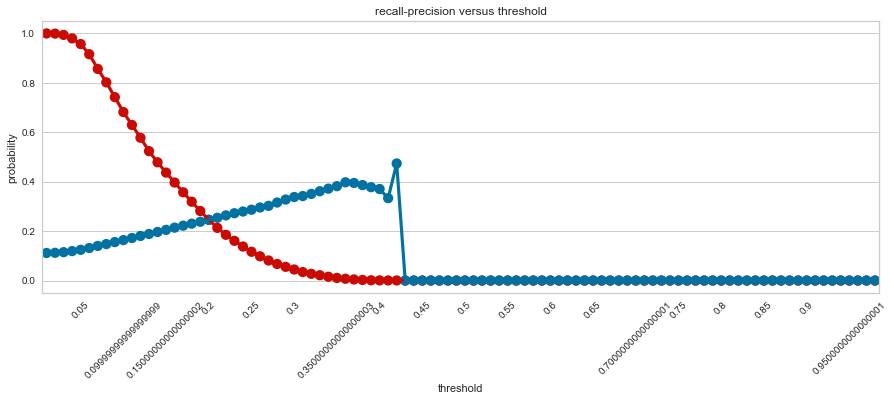

In [103]:
modelado.plot_recall_precission(prediccion, 'Target')

In [128]:
def binary_target(x):
    if x<=0.17:
        y=0
    else:
        y=1
    return y

prediccion = prediccion.assign(binary_y_predicted = prediccion['probabilidad'].apply(binary_target))

In [129]:
print(classification_report(prediccion.Target, prediccion.binary_y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88    220336
           1       0.22      0.36      0.27     27676

    accuracy                           0.79    248012
   macro avg       0.57      0.60      0.58    248012
weighted avg       0.84      0.79      0.81    248012



In [130]:
confusion_matrix(prediccion.Target, prediccion.binary_y_predicted)

array([[185692,  34644],
       [ 17790,   9886]], dtype=int64)

In [107]:
8828/27676

0.3189767307414366

In [127]:
173476/220336

0.7873248130128531

In [49]:
base.columns

Index(['puntajeDS', 'Sistema_Operativo', 'estadomovil',
       'ingresoMensual_iff_cal', 'EAScore', 'Ciudad_catg', 'ipDistanceKm',
       'Departamento_IP', 'VlrPago_Vencimiento_SMMLV_cal', 'plazoSolicitado',
       'Meses_Primera_Solicitud', 'Porcn_gasto_cal', 'Tipo_Cliente',
       'nivelEstudio_catg', 'numeropersonasdependientes_cal', 'Score_cal',
       'documento', 'credito_id', 'Periodo_Desembolso', 'Target'],
      dtype='object')

In [50]:
df_calf = modelado.calificacion('no', log_test, X_cleaned, base, ['documento','credito_id','Periodo_Desembolso','Tipo_Cliente','Target'])

In [51]:
df_calf.head()

documento  credito_id Periodo_Desembolso Tipo_Cliente  Target  \
0    80140622      951740            2021-05        Nuevo       0   
1  1065645849      953039            2021-05        Nuevo       1   
2  1080295881      955797            2021-05   Recurrente       0   
3  1018407865      955907            2021-05        Nuevo       0   
4  1057605999      957197            2021-05        Nuevo       0   

   probabilidad  score_cal  
0      0.125907      874.0  
1      0.143963      856.0  
2      0.078911      921.0  
3      0.089085      911.0  
4      0.182129      818.0

In [141]:
df_calf.describe().round(2)

documento  credito_id     Target  probabilidad  score_cal
count  2.480120e+05   248012.00  248012.00     248012.00  248012.00
mean   6.791341e+08  1198907.16       0.11          0.11     888.30
std    4.941823e+08   133864.18       0.31          0.07      65.86
min    1.796360e+05   951740.00       0.00          0.01     553.00
25%    7.056825e+07  1082231.75       0.00          0.06     854.00
50%    1.018404e+09  1191891.50       0.00          0.09     905.00
75%    1.072530e+09  1316305.25       0.00          0.15     937.00
max    2.000004e+09  1437992.00       1.00          0.45     988.00

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

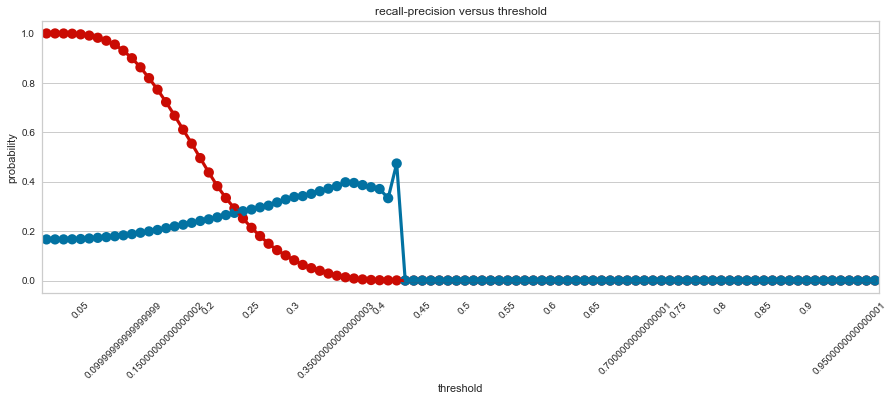

In [53]:
modelado.plot_recall_precission(df_calf.query(" Tipo_Cliente=='Nuevo' "), 'Target')

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

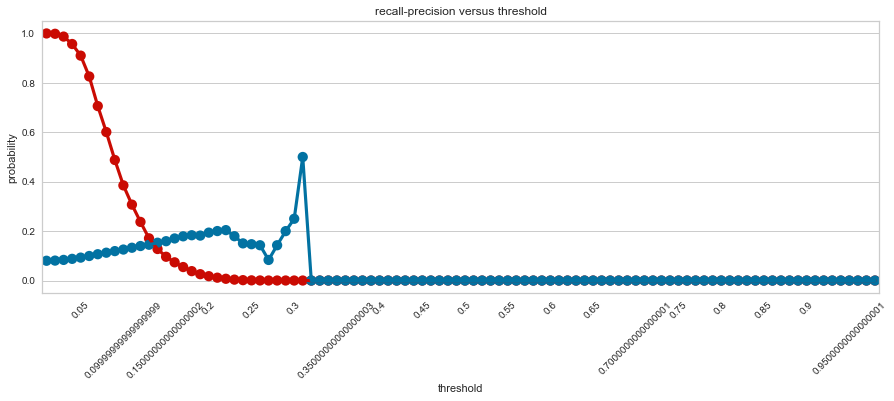

In [54]:
modelado.plot_recall_precission(df_calf.query(" Tipo_Cliente!='Nuevo' "), 'Target')

In [55]:
df_calf.query(" Tipo_Cliente!='Nuevo' ").describe()

documento    credito_id         Target   probabilidad      score_cal
count  1.575370e+05  1.575370e+05  157537.000000  157537.000000  157537.000000
mean   6.534946e+08  1.199021e+06       0.080064       0.079298     920.702241
std    4.993658e+08  1.335123e+05       0.271393       0.036994      36.995092
min    1.796360e+05  9.557970e+05       0.000000       0.011674     677.000000
25%    6.025401e+07  1.082498e+06       0.000000       0.053204     901.000000
50%    1.016077e+09  1.191400e+06       0.000000       0.072702     927.000000
75%    1.069728e+09  1.317150e+06       0.000000       0.099375     947.000000
max    2.000003e+09  1.437992e+06       1.000000       0.323496     988.000000

In [56]:
df_calf.query(" Tipo_Cliente=='Nuevo' ").describe()

documento    credito_id        Target  probabilidad     score_cal
count  9.047500e+04  9.047500e+04  90475.000000  90475.000000  90475.000000
mean   7.237781e+08  1.198709e+06      0.166488      0.168133    831.869599
std    4.817819e+08  1.344753e+05      0.372520      0.067050     67.050109
min    1.796360e+05  9.517400e+05      0.000000      0.020990    553.000000
25%    7.870567e+07  1.081916e+06      0.000000      0.118716    790.000000
50%    1.020481e+09  1.192796e+06      0.000000      0.161138    839.000000
75%    1.075660e+09  1.314929e+06      0.000000      0.209737    881.000000
max    2.000004e+09  1.437965e+06      1.000000      0.447193    979.000000

In [52]:
datos.guardar('no', 'DB', 'Calificacion', df_calf)

In [43]:
Pkl_Filename = "../Modelo/Logit_Model_DA.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(log_test, file)

In [131]:
import lightgbm as lgb

In [132]:
y_train_mod = y_train.replace(0, 1).to_frame()
y_test_mod = y_test.replace(1, 0).to_frame()
df_train = pd.concat([X_train, y_train_mod], axis=1)
df_test = pd.concat([X_test, y_test_mod], axis=1)
df_adver = pd.concat([df_train, df_test])

In [133]:
X_train_ad, X_test_ad, y_train_ad, y_test_ad = modelado.particion(df_adver[campos],'Target',0.25)

In [134]:
clf_ad = lgb.LGBMClassifier()
clf_ad.fit(X_train_ad,y_train_ad)

LGBMClassifier()

In [135]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(clf_ad, X_train_ad, y_train_ad, 8, 'roc_auc')

In [136]:
print(accuracies, media_cross, desviacion_cross)

[0.49669338 0.5077711  0.50490975 0.50278142 0.50010584 0.50031108
 0.50818207 0.50461394] 0.5031710736288535 0.003725968446924963


In [116]:
log_test1 = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced', C=0.1, random_state=45 ,verbose=2 ,n_jobs=-1)

In [117]:
log_test1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(C=0.1, class_weight='balanced', n_jobs=-1, random_state=45,
                   verbose=2)

In [118]:
log_test_odds = log_test1.coef_[0]
test_coef = pd.DataFrame(log_test_odds,base_woe[campos[:-1]].columns, columns=['coef'])\
            .sort_values(by='coef', ascending=False)

In [119]:
test_coef

coef
plazoSolicitado                 0.876621
Ciudad_catg                     0.851484
Tipo_Cliente                    0.636297
Sistema_Operativo               0.551815
VlrPago_Vencimiento_SMMLV_cal   0.506614
puntajeDS                       0.474161
estadomovil                     0.462275
Score_cal                       0.394592
Porcn_gasto_cal                 0.377794
Departamento_IP                 0.349474
EAScore                         0.334662
numeropersonasdependientes_cal  0.261706
nivelEstudio_catg               0.032166
ingresoMensual_iff_cal          0.025510
Meses_Primera_Solicitud        -0.273791
ipDistanceKm                   -0.279730

In [120]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(log_test1, X_test, y_test, 8, 'roc_auc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

In [121]:
print(accuracies, media_cross, desviacion_cross)

[0.65693104 0.66115735 0.66078321 0.65218983 0.66951276 0.67602848
 0.66367021 0.66942553] 0.663712300994275 0.00717492633593686


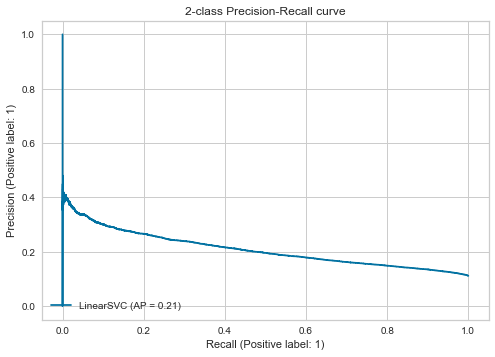

In [122]:
display = PrecisionRecallDisplay.from_estimator(
    log_test1, X_train, y_train, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

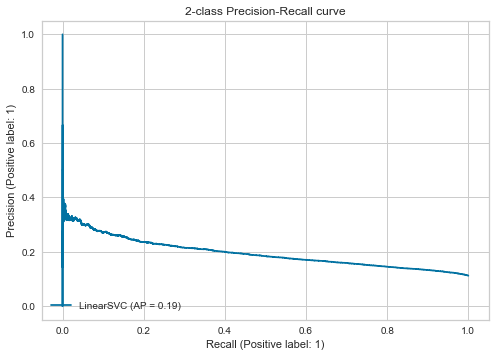

In [123]:
display = PrecisionRecallDisplay.from_estimator(
    log_test1, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [89]:
log_test2 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced',  C=0.3 ,verbose=2)

In [90]:
log_test2.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=0.3, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=2)

In [91]:
log_test_odds = log_test2.coef_[0]
test_coef = pd.DataFrame(log_test_odds,base_woe[campos[:-1]].columns, columns=['coef'])\
            .sort_values(by='coef', ascending=False)

In [92]:
test_coef

coef
plazoSolicitado                 0.879542
Ciudad_catg                     0.856047
Tipo_Cliente                    0.636984
Sistema_Operativo               0.554913
VlrPago_Vencimiento_SMMLV_cal   0.506232
puntajeDS                       0.474296
estadomovil                     0.462354
Score_cal                       0.394840
Porcn_gasto_cal                 0.379454
Departamento_IP                 0.346669
EAScore                         0.336691
numeropersonasdependientes_cal  0.259207
nivelEstudio_catg               0.029528
ingresoMensual_iff_cal          0.022576
Meses_Primera_Solicitud        -0.273246
ipDistanceKm                   -0.282176

In [93]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(log_test2, X_test, y_test, 8, 'roc_auc')

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [94]:
print(accuracies, media_cross, desviacion_cross )

[0.65687967 0.66110597 0.66063933 0.65213756 0.66942797 0.67593445
 0.66359767 0.66940555] 0.6636410205150995 0.00717052099032544
